In [25]:
### IMPORT LIBRARIES
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GRU
from tensorflow.keras.layers import SpatialDropout1D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
### LOADING THE DATASET
df = pd.read_csv('fake_or_real_news.csv')


df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [27]:
### DROPPING UNECESSARY COLUMN
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [28]:
### CONVERTING CATEGORICAL TO NUMERICAL LABELS
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1}).astype(int)

In [29]:
### SEAPARATING TEXTS AND LABELS
texts = df['title'] + " " + df['text']
labels = df['label'].values

In [30]:
### TEXT PREPROCESSING AND PADDING TO SEQUENCES
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)


X_pad = pad_sequences(X, maxlen=300)


In [31]:
### TRAIN TEST SPLITTING
X_train, X_test, y_train, y_test = train_test_split(X_pad, labels, test_size=0.2, random_state=42)

In [32]:
### STANDARD LSTM MODEL BUILDING AND MODEL COMPILING
model = Sequential()


model.add(Embedding(input_dim=5000, output_dim=100, input_length=300))


model.add(SpatialDropout1D(0.2))


model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))


model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, 300))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 300, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_3                  │ (None, 300, 100)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 580,501 (2.21 MB)

 Trainable params: 580,501 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
### LSTM MODEL TRAINING
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), verbose=2)

Epoch 1/3
80/80 - 82s - 1s/step - accuracy: 0.7198 - loss: 0.5882 - val_accuracy: 0.8272 - val_loss: 0.4164
Epoch 2/3
80/80 - 81s - 1s/step - accuracy: 0.8629 - loss: 0.3500 - val_accuracy: 0.8461 - val_loss: 0.3661
Epoch 3/3
80/80 - 80s - 1s/step - accuracy: 0.8968 - loss: 0.2790 - val_accuracy: 0.8682 - val_loss: 0.3204


In [34]:
### LSTM MODEL EVALUATION
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Loss:", loss)
print('Test Accuracy:', accuracy)


40/40 - 6s - 149ms/step - accuracy: 0.8682 - loss: 0.3204
Test Loss: 0.32035595178604126
Test Accuracy: 0.8681925535202026


In [35]:
### OUTLINE PREDICTION
new_text = ["Breaking news: A new technology is going to change the world."]
new_text_seq = tokenizer.texts_to_sequences(new_text)
new_text_pad = pad_sequences(new_text_seq, maxlen=300)


In [36]:
prediction = model.predict(new_text_pad)
print("Predicted label: ", "Real" if prediction >= 0.5 else "Fake")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
Predicted label:  Fake


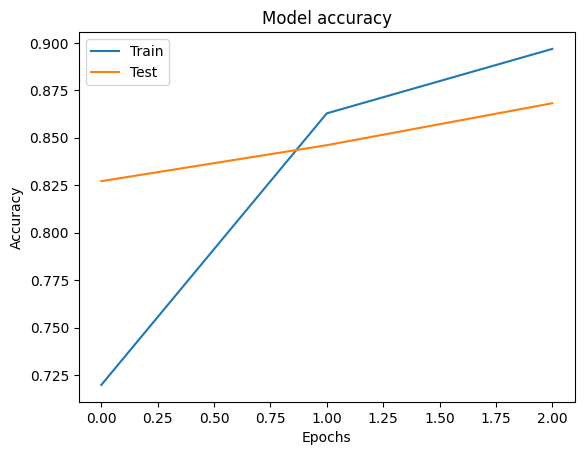

In [37]:
### PLOTTING THE TRAINING HISTORY

### ACCURACY COMPARISON

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



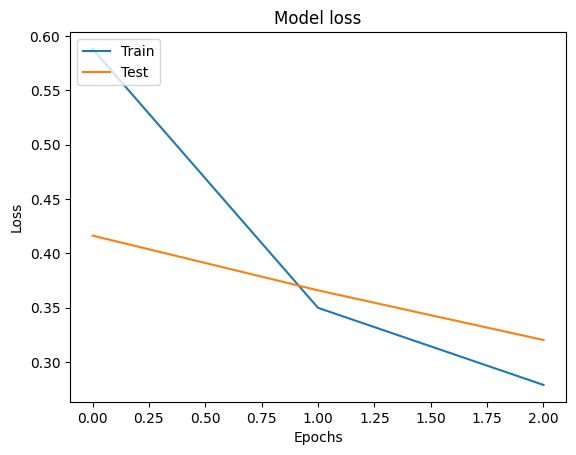

In [38]:
### LOSS COMPARISON

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
### BIDIRECTIONAL LSTM MODEL BUILDING AND MODEL COMPILING
model_bilstm = Sequential()


model_bilstm.add(Embedding(input_dim=5000, output_dim=100, input_length=300))


model_bilstm.add(SpatialDropout1D(0.2))


model_bilstm.add(Bidirectional(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2)))


model_bilstm.add(Dense(1, activation='sigmoid'))
model_bilstm.build(input_shape=(None, 300))

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_bilstm.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 300, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_4                  │ (None, 300, 100)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 200)                 │         160,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 661,001 (2.52 MB)

 Trainable params: 661,001 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
### BIDIRECTIONAL LSTM MODEL TRAINING
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), verbose=2)

Epoch 1/3
80/80 - 150s - 2s/step - accuracy: 0.6914 - loss: 0.5670 - val_accuracy: 0.8074 - val_loss: 0.4579
Epoch 2/3
80/80 - 141s - 2s/step - accuracy: 0.8601 - loss: 0.3470 - val_accuracy: 0.8627 - val_loss: 0.3408
Epoch 3/3
80/80 - 146s - 2s/step - accuracy: 0.9144 - loss: 0.2238 - val_accuracy: 0.8753 - val_loss: 0.3130


In [41]:
### BIDIRECTIONAL MODEL EVALUATION
loss_bilstm, accuracy_bilstm = model_bilstm.evaluate(X_test, y_test, verbose=2)



print("Bidirectional LSTM Test Loss:",  loss_bilstm)
print("Bidirectional LSTM Test Accuracy:", accuracy_bilstm)


40/40 - 12s - 305ms/step - accuracy: 0.8753 - loss: 0.3130
Bidirectional LSTM Test Loss: 0.3130372166633606
Bidirectional LSTM Test Accuracy: 0.8752959966659546


In [42]:
### OUTLINE PREDICTION
new_text = ["Breaking news: A new technology is going to change the world."]
new_text_seq = tokenizer.texts_to_sequences(new_text)
new_text_pad = pad_sequences(new_text_seq, maxlen=300)

prediction = model_bilstm.predict(new_text_pad)
print("Predicted label: ", "Real" if prediction >= 0.5 else "Fake")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step
Predicted label:  Fake


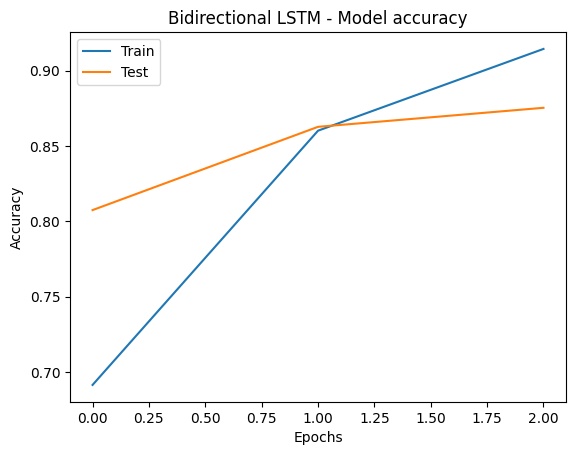

In [43]:
### TRAINING HISTORY

### ACCURACY COMPARISON

plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Bidirectional LSTM - Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


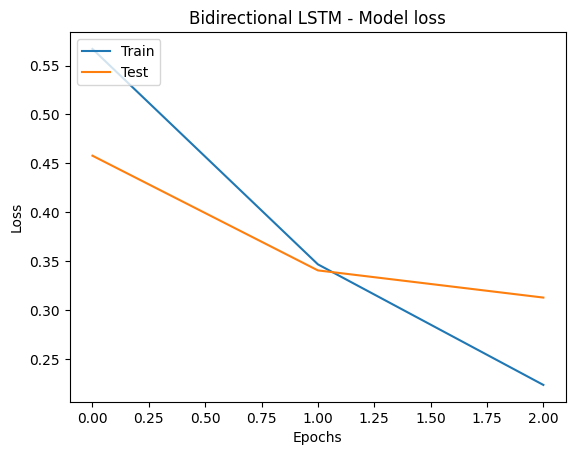

In [44]:
### LOSS COMPARISON
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Bidirectional LSTM - Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [45]:
### GRU MODEL BUILDING AND MODEL COMPILING
model_gru = Sequential()


model_gru.add(Embedding(input_dim=5000, output_dim=100, input_length=300))


model_gru.add(SpatialDropout1D(0.2))


model_gru.add(GRU(units=100, dropout=0.2, recurrent_dropout=0.2))


model_gru.add(Dense(1, activation='sigmoid'))
model_gru.build(input_shape=(None, 300))

# Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [46]:
### GRU MODEL TRAINING
history_gru = model_gru.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), verbose=2)

Epoch 1/3
80/80 - 76s - 946ms/step - accuracy: 0.6807 - loss: 0.5741 - val_accuracy: 0.8058 - val_loss: 0.4150
Epoch 2/3
80/80 - 72s - 894ms/step - accuracy: 0.8532 - loss: 0.3354 - val_accuracy: 0.8240 - val_loss: 0.4003
Epoch 3/3
80/80 - 81s - 1s/step - accuracy: 0.9165 - loss: 0.2255 - val_accuracy: 0.8224 - val_loss: 0.4149


In [47]:
### MODEL EVALUATION
loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test, verbose=2)

print("GRU Test Loss:",  loss_gru)
print("GRU Test Accuracy:",  accuracy_gru)



40/40 - 6s - 151ms/step - accuracy: 0.8224 - loss: 0.4149
GRU Test Loss: 0.414944589138031
GRU Test Accuracy: 0.8224151730537415


In [48]:
### OUTLINE PREDICTION
new_text = ["Breaking news: A new technology is going to change the world."]
new_text_seq = tokenizer.texts_to_sequences(new_text)
new_text_pad = pad_sequences(new_text_seq, maxlen=300)

prediction = model_gru.predict(new_text_pad)
print("Predicted label: ", "Real" if prediction >= 0.5 else "Fake")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
Predicted label:  Real


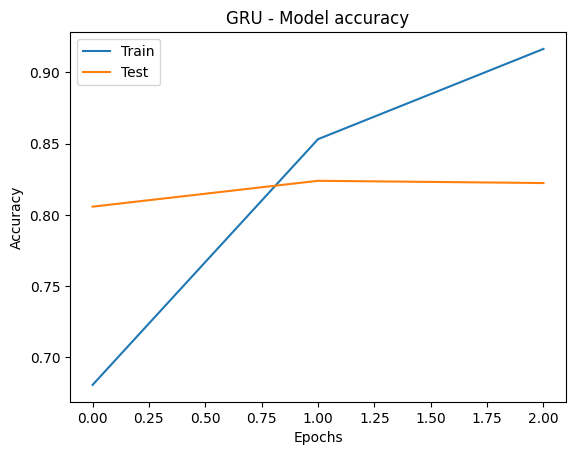

In [49]:
### ACCURACY COMPARISON
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('GRU - Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

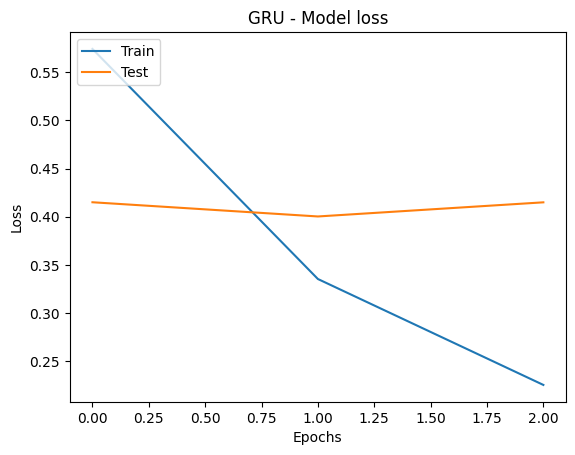

In [50]:
### LOSS COMPARISON
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU - Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()